<a href="https://colab.research.google.com/github/manishiitg/ML_Experments/blob/master/nlp/101/word2vec_experiments_plotting_and_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualizing word2vec embeddings**

Further extension on word2vec and to be able to see more data and understand our embeddings. 



In [42]:
!pip install wordcloud

In [0]:
# https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57

%matplotlib inline

import pandas as pd
import numpy as np

import spacy 
nlp = spacy.load("en_core_web_sm")

from gensim.models import KeyedVectors

from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer


from collections import defaultdict

import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [0]:
!unzip text_cv.zip

In [0]:
def normalize(comment, lowercase=True, remove_stopwords=True):
    if lowercase:
        comment = comment.lower()
    lines = comment.splitlines()
    lines = [x.strip(' ') for x in lines]
    lines = [x.replace('"', '') for x in lines]
    lines = [x.replace('\\"', '') for x in lines]
    lines = [x.replace(u'\xa0', u'') for x in lines]
    comment = " ".join(lines)
    doc = nlp(comment)

    # for token in doc:
    #   print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
    #     token.shape_, token.is_alpha, token.is_stop)

    words = [token for token in doc if token.is_stop !=
             True and token.is_punct != True]
    # return " ".join(words)
    lemmatized = list()
    for word in words:
        lemma = word.lemma_.strip()
        if lemma:
            lemmatized.append(lemma)
    return lemmatized

In [46]:
import os

if os.path.isdir("text_cv"):
  class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield gensim.utils.simple_preprocess(line)
 
  sentences = MySentences('text_cv') # a memory-friendly iterator
  model = gensim.models.Word2Vec(sentences)

else:
  from sklearn.datasets import fetch_20newsgroups
  news = fetch_20newsgroups(subset="train")

  def writetofile(dir, filename, data):
      if not os.path.exists(dir):
          os.makedirs(dir)
      f = os.path.join(dir,str(filename))

      with open(f, 'wb') as the_file:
        the_file.write(data)

  news = fetch_20newsgroups(subset="train", categories=['alt.atheism', 'comp.graphics'])


  clean_data  = []

  # print(news.keys())

  # print(news["filenames"][:10])

  # print(len(news["data"][:1000]))

  # print(news["target_names"][:50])
  # print(news["target"][:10])


  max_limit = 1000

  targets = news["target"][:max_limit]
  filenames = news["filenames"][:max_limit]
  news = news["data"][:max_limit]

  dir = "news_group_cleaned"

  print("cleaning data")
  for i, row in enumerate(news):
    filename = filenames[i]
    filename = filename[(filename.rfind('/'))+1:]
    if os.path.exists(filename):
      with open(os.path.join(dir, filename), 'r') as content_file:
        data = content_file.read()
        cleaned = data.split(" ")
    else:
      cleaned = normalize(row)
      writetofile(dir, filename, " ".join(cleaned).encode("utf-8"))
      
    
    clean_data.append(cleaned)

  print("data cleaned")
  model = gensim.models.Word2Vec(clean_data)


# print(clean_data[10])

2019-11-07 13:15:31,484 : INFO : collecting all words and their counts
2019-11-07 13:15:31,488 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-11-07 13:15:31,557 : INFO : PROGRESS: at sentence #10000, processed 20188 words, keeping 3640 word types
2019-11-07 13:15:31,621 : INFO : PROGRESS: at sentence #20000, processed 41072 words, keeping 5888 word types
2019-11-07 13:15:31,685 : INFO : PROGRESS: at sentence #30000, processed 61802 words, keeping 7358 word types
2019-11-07 13:15:31,750 : INFO : PROGRESS: at sentence #40000, processed 82035 words, keeping 8672 word types
2019-11-07 13:15:31,818 : INFO : PROGRESS: at sentence #50000, processed 102623 words, keeping 9972 word types
2019-11-07 13:15:31,884 : INFO : PROGRESS: at sentence #60000, processed 123860 words, keeping 11051 word types
2019-11-07 13:15:31,945 : INFO : PROGRESS: at sentence #70000, processed 143333 words, keeping 11934 word types
2019-11-07 13:15:32,018 : INFO : PROGRESS: at sentence 

In [47]:
Z = model.wv.vectors
print(len(model.wv.vectors))
print(Z[0].shape)
model.wv.index2word[10]

7566
(100,)


'project'

In [48]:
words = []

for sents in clean_data:
   for word in sents:
     words.append(word)


# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.wv.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.wv.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a dataframe
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
# df.shape
df



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
subject,0.018902,0.175763,0.020582,0.025837,0.016935,0.110208,-0.006789,-0.134234,-0.015744,-0.062082,-0.135255,0.173783,-0.041299,-0.110796,-0.037544,0.156492,0.056489,0.057597,0.206049,-0.075278,-0.189485,0.008507,-0.240688,-0.279055,-0.031032,0.090496,0.065691,0.168547,-0.075461,-0.159278,0.087560,0.102793,-0.153960,-0.057759,-0.056516,-0.128146,0.129116,-0.114532,0.185339,-0.192231,...,0.319617,0.008084,-0.052019,-0.011661,-0.073523,0.016426,0.159067,0.158635,-0.012877,0.008431,-0.069452,-0.062633,-0.204479,0.105823,-0.139511,-0.094031,0.180359,-0.312082,0.194157,-0.369300,0.217053,-0.167448,0.045732,-0.149071,-0.125327,0.089530,-0.079319,0.014414,0.195441,-0.071948,0.040897,-0.046685,-0.193336,0.220855,0.123455,-0.089717,0.371324,-0.218745,0.122599,0.213728
year,0.016582,0.425534,1.151692,0.777857,-0.179315,-1.349917,1.718300,-0.508238,-0.946690,0.015122,0.816912,0.211912,0.805383,-0.755502,0.021392,0.911381,0.467985,0.396467,1.008427,-1.023817,-1.006437,0.856717,-0.300229,-0.120634,-0.862997,1.467703,-0.579403,0.056983,0.355985,0.267889,0.393269,-0.341725,0.057648,0.273202,0.329356,-0.275487,0.741108,1.819581,-1.060666,-0.983120,...,-0.327060,0.768796,0.205810,-0.008732,0.893480,0.876683,1.286490,-1.102538,-0.748430,-0.974908,-0.893916,0.453657,-2.587845,0.557025,-0.781019,-1.305490,0.395720,0.261360,-0.110628,-0.918220,1.656486,-1.234587,1.421094,-0.301590,0.717889,-0.184622,0.950744,1.163931,0.207486,1.249818,-0.173488,-0.734040,-0.695581,0.368864,0.417673,-0.735078,1.762899,-0.981371,-0.432451,0.805379
christian,-0.085130,0.101119,-0.004949,0.005882,0.022155,-0.035101,-0.075631,-0.086292,-0.038992,0.009063,0.006328,-0.030193,0.001464,0.064636,0.037437,0.009156,0.033061,-0.080012,-0.041368,-0.073995,-0.061117,0.048267,-0.065361,-0.165866,0.041347,0.019503,-0.031021,0.058710,0.029416,-0.110064,0.012020,-0.066374,-0.033765,-0.072088,0.023237,-0.051210,0.090615,0.051369,0.052572,-0.036253,...,0.015692,0.036539,-0.016595,-0.044936,-0.081552,0.018034,0.047044,0.065145,-0.088536,0.030935,0.056309,-0.018715,0.001572,0.027526,0.052427,-0.023416,0.170821,-0.006678,0.080852,-0.070758,-0.040359,0.040921,0.035346,-0.012665,0.002724,-0.047666,-0.040384,0.009236,0.056661,0.015876,0.015118,-0.014739,-0.043972,-0.008158,0.028552,-0.022445,0.224948,-0.032221,0.091849,0.012291
organization,-1.916205,-0.133026,2.059584,1.101935,0.027972,1.937142,1.853328,0.825325,0.388729,-0.669307,0.922748,0.752448,1.194707,1.457253,-1.402825,1.726748,-0.903366,-0.099318,2.172728,-0.265533,-0.914802,2.780946,-1.350355,-1.890603,-3.257090,-0.101679,0.476947,-1.838962,-0.953342,-0.608274,2.019664,1.249502,0.755380,2.602626,0.386986,-0.781800,-2.557409,1.926392,1.577278,-0.609596,...,2.560690,1.799921,0.405504,-0.598762,-1.180972,2.050941,-1.046969,-0.183881,1.203544,-1.743312,-1.756753,2.157980,-1.491130,2.127576,0.299913,-2.354048,-0.622779,1.233232,0.434578,-2.260237,2.982369,-4.203658,-1.580527,0.868196,2.539811,-0.158476,1.163413,1.198240,0.274984,0.511274,-0.039327,1.991786,-1.093178,1.171994,-1.293754,-0.174364,1.766000,0.553204,-0.963694,1.460151
ag,-0.069068,0.113276,-0.008672,-0.029886,-0.003315,-0.031499,-0.020032,-0.094187,-0.043009,0.029891,0.070765,-0.136886,-0.010313,0.120596,0.108179,0.057013,0.033341,-0.119248,-0.126033,-0.057270,-0.028950,-0.047343,-0.130952,-0.226551,0.047513,0.051383,0.080945,0.038219,0.007218,-0.177205,0.017517,-0.088004,-0.045157,-0.021094,-0.019335,-0.070846,0.115493,0.084904,0.094106,-0.020806,...,-0.012464,0.105826,-0.018741,-0.033580,-0.153877,-0.004753,-0.019566,0.043845,-0.124733,-0.024526,0.031393,-0.076312,0.024039,-0.019088,0.121990,-0.052861,0.281949,-0.031459,0.087482,-0.096897,-0.077676,0.080625,0.062576,-0.050295,0.011008,-0.092540,-0.112763,0.048491,0.006644,-0.052973,-0.00

In [0]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [0]:
centers, clusters = clustering_on_wordvecs(Z, 50);
centroid_map = dict(zip(model.wv.index2word, clusters));

In [0]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;

In [52]:
top_words = get_top_words(model.wv.index2word, 5, centers, Z);

top_words



,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16,Cluster #17,Cluster #18,Cluster #19,Cluster #20,Cluster #21,Cluster #22,Cluster #23,Cluster #24,Cluster #25,Cluster #26,Cluster #27,Cluster #28,Cluster #29,Cluster #30,Cluster #31,Cluster #32,Cluster #33,Cluster #34,Cluster #35,Cluster #36,Cluster #37,Cluster #38,Cluster #39,Cluster #40,Cluster #41,Cluster #42,Cluster #43,Cluster #44,Cluster #45,Cluster #46,Cluster #47,Cluster #48,Cluster #49,Cluster #50
1,ci,invoices,successful,polytechnic,hibernate,particulars,tag,functionality,associate,movies,utilize,rachna,then,executing,will,sekhar,leadership,github,mr,true,ahmad,toward,cultural,nagar,looking,back,akhpur,developing,adobe,portal,electronics,limited,declare,myself,customers,willing,ui,certification,dr,distt,framework,organization,pvt,which,april,passed,window,seo,december,week
2,volley,balance,organisation,aligarh,jdbc,furnished,youtube,modules,intern,watching,contribute,srinagar,when,review,would,kapoorchand,interpersonal,linkedin,mrs,correct,parvesh,teamwork,annual,colony,seeking,backend,educo,design,ide,designed,tech,india,hereby,potential,get,flexible,frontend,internship,abdul,road,ajax,opportunity,private,it,jan,intermediate,linux,media,september,two
3,parsing,regularly,become,pcm,servlet,given,image,into,trainee,badminton,enhance,manav,purchase,recommendations,be,purbia,excellent,url,kumar,above,harsh,determination,sports,vihar,opportunity,front,pratapgarh,designing,sublime,developed,cse,private,mentioned,while,they,adapt,backend,certified,kalam,near,nodejs,career,noida,that,feb,xii,ubuntu,campaigns,february,successfully
4,retrofit,payments,being,bseb,mvc,correctness,article,products,designation,singing,abilities,kerala,easy,preparing,get,supernetting,analytical,id,mother,best,saini,reliable,participation,near,job,frontend,cor,applications,dreamweaver,made,mca,infotech,furnished,effectively,users,deadlines,designer,days,rajasthan,po,angular,company,trainee,also,aug,cbse,os,social,november,three
5,softwares,buying,result,bareilly,frameworks,provided,instagram,features,analyst,cooking,skills,iet,each,fixing,any,reader,strong,mail,yadav,mentioned,mayank,continuously,quiz,road,myself,end,ansible,implementation,netbeans,module,bachelor,noida,particulars,grow,them,ready,intern,weeks,uttar,block,jquery,professional,june,provide,august,class,win,strategies,sep,seminar


In [0]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

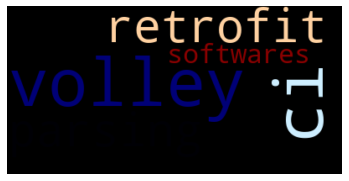

In [54]:
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
i = 0
col = next(cmaps);
display_cloud(i+1, col)

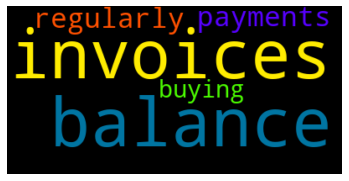

In [55]:
i = 1
col = next(cmaps);
display_cloud(i+1, col)

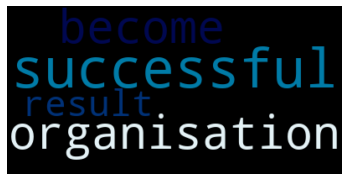

In [56]:
i = 2
col = next(cmaps);
display_cloud(i+1, col)

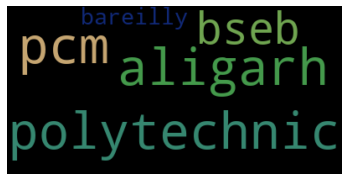

In [57]:
i = 3
col = next(cmaps);
display_cloud(i+1, col)

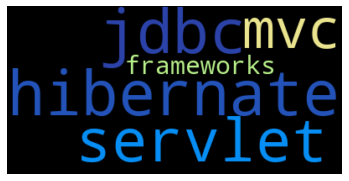

In [58]:
i = 4
col = next(cmaps);
display_cloud(i+1, col)

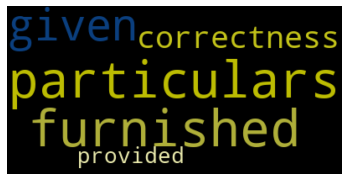

In [59]:
i = 5
col = next(cmaps);
display_cloud(i+1, col)

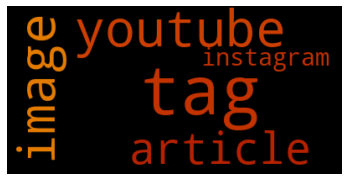

In [60]:
i = 6
col = next(cmaps);
display_cloud(i+1, col)

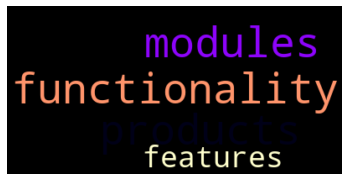

In [61]:
i = 7
col = next(cmaps);
display_cloud(i+1, col)

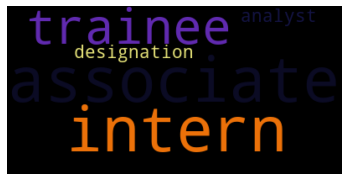

In [62]:
i = 8
col = next(cmaps);
display_cloud(i+1, col)

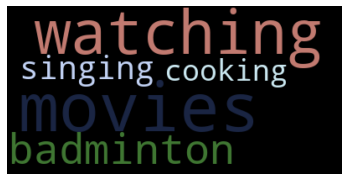

In [63]:
i = 9
col = next(cmaps);
display_cloud(i+1, col)

In [0]:
def print_word_table(table, key):
    return pd.DataFrame(table, columns=[key, 'similarity'])